In [4]:
import pandas as pd

# Load the CSV file
file_path = r"C:\Users\clint\Desktop\Lifecycle_RA\Data\Processed\Combined_Csvs\combined_data.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the data
data

,Date,4YO,5YO,3-5YO Avg.,Source_File,3YO,3-5YO Avg,2YO
0,2015-01-01,79700,69700,77800,02_2018.csv,NaN,NaN,NaN
1,2015-01-01,78000,70000,79000,03_2018.csv,NaN,NaN,NaN
2,2015-01-01,78000,70000,80000,04_2018.csv,NaN,NaN,NaN
3,2015-01-01,78000,70000,80000,08_2018.csv,NaN,NaN,NaN
4,2015-01-01,78000,70000,85000,05_2018.csv,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2115,2024-09-01,54000,41000,NaN,03_2025.csv,93000.0,NaN,NaN
2116,2024-09-01,73000,49000,NaN,01_2025.csv,94000.0,NaN,NaN
2117,2024-11-01,51000,43000,NaN,03_2025.csv,92000.0,NaN,NaN
2118,2024-11-01,58000,44000,NaN,01_2025.csv,84000.0,NaN,NaN


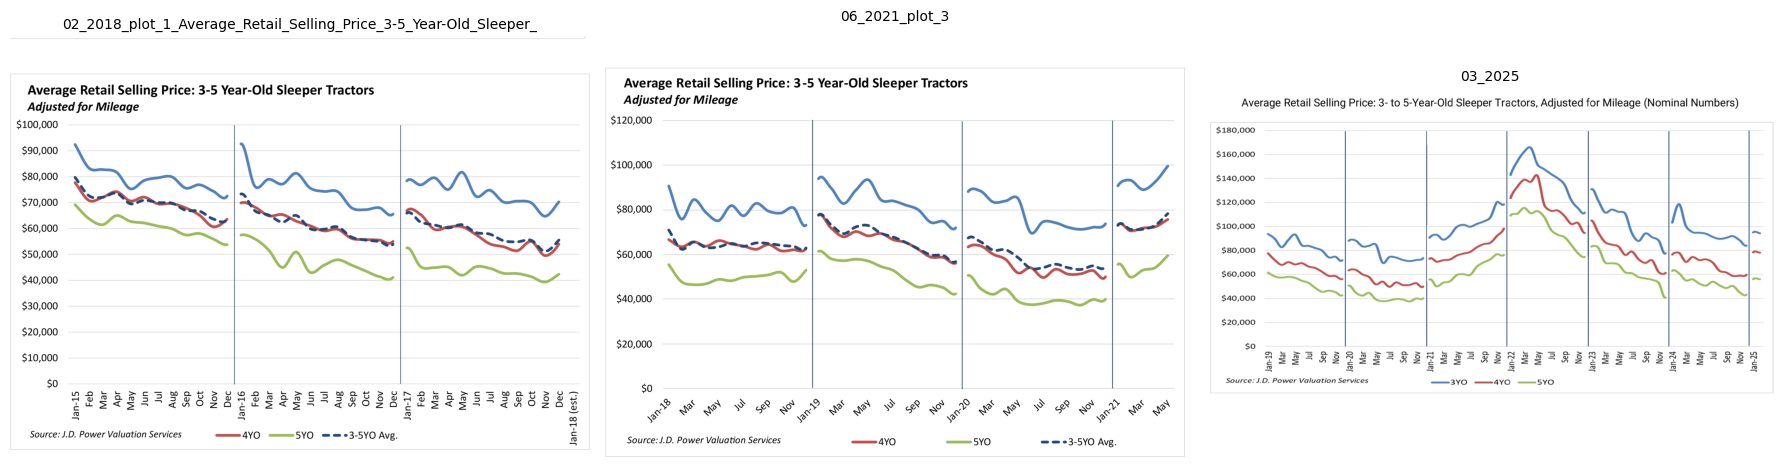

In [5]:
# Import libraries for displaying images
from IPython.display import Image, display
import matplotlib.pyplot as plt
import os

# Define image paths
image_paths = [
    r"C:\Users\clint\Desktop\Lifecycle_RA\Data\Processed\Sorted_Images\02_2018_plot_1_Average_Retail_Selling_Price_3-5_Year-Old_Sleeper_.png",
    r"C:\Users\clint\Desktop\Lifecycle_RA\Data\Processed\Sorted_Images\06_2021_plot_3.png",
    r"C:\Users\clint\Desktop\Lifecycle_RA\Data\Processed\Sorted_Images\03_2025.png"
]

# Create a figure with 3 subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Display each image in a subplot
for i, image_path in enumerate(image_paths):
    if os.path.exists(image_path):
        img = plt.imread(image_path)
        axes[i].imshow(img)
        axes[i].axis('off')  # Hide axes
        # Extract filename for the title
        title = os.path.basename(image_path).split('.')[0]
        axes[i].set_title(title, fontsize=10)
    else:
        axes[i].text(0.5, 0.5, f"Image not found\n{os.path.basename(image_path)}", 
                 ha='center', va='center', color='red')
        axes[i].axis('off')

plt.tight_layout()
plt.show()

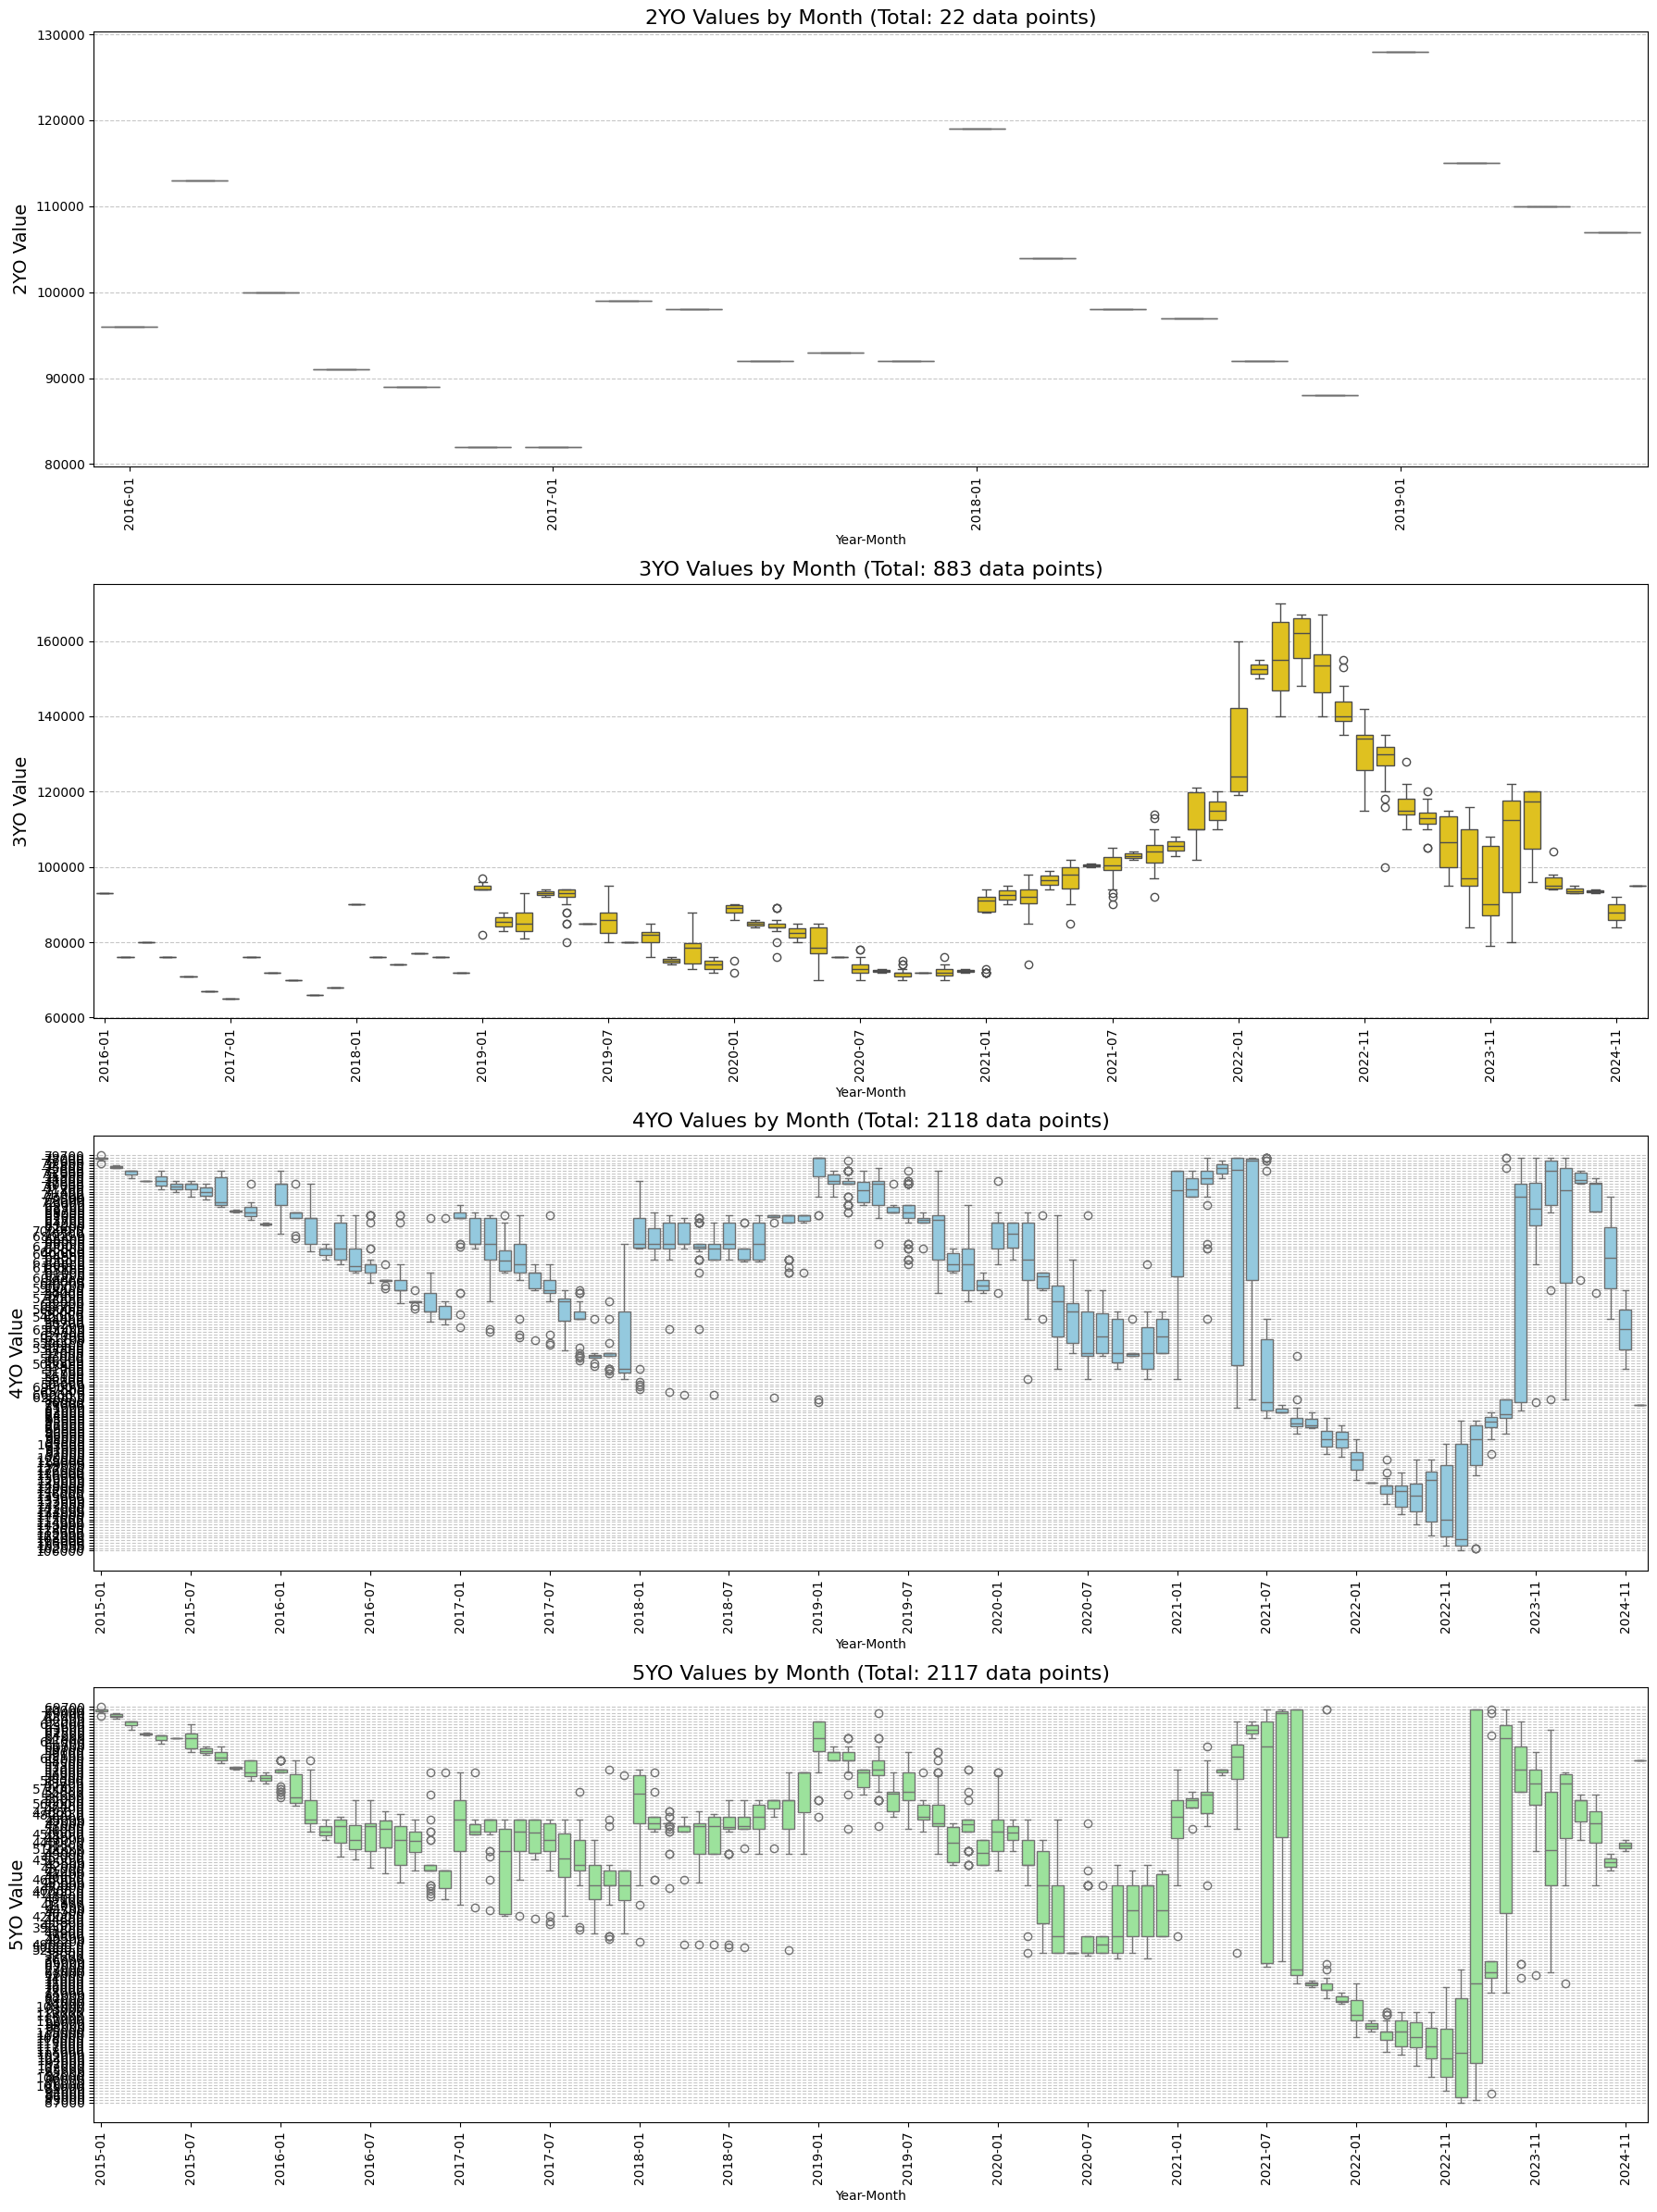

Monthly Summary Statistics:

2YO Monthly Statistics:
Number of months with data: 22
Average number of data points per month: 1.0

3YO Monthly Statistics:
Number of months with data: 74
Average number of data points per month: 11.9


TypeError: agg function failed [how->mean,dtype->object]

In [6]:
# Create monthly box plots for each age group
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Convert Date to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Extract month and year for grouping
data['Year-Month'] = data['Date'].dt.strftime('%Y-%m')

# Select age groups to analyze - removed 6YO since it doesn't exist
age_groups = ['2YO', '3YO', '4YO', '5YO']

# Create a figure with subplots for each age group
fig, axes = plt.subplots(4, 1, figsize=(18, 24))

# Define colors for each age group
colors = {
    '2YO': 'lightcoral',
    '3YO': 'gold',
    '4YO': 'skyblue', 
    '5YO': 'lightgreen'
}

# Create boxplots for each age group
for i, age_group in enumerate(age_groups):
    # Filter data for this age group (drop NaN values)
    age_data = data.dropna(subset=[age_group]).copy()
    
    # Prepare data in a format suitable for seaborn
    melted_data = pd.DataFrame({
        'Year-Month': age_data['Year-Month'],
        'Value': age_data[age_group]
    })
    
    # Create the boxplot
    sns.boxplot(x='Year-Month', y='Value', data=melted_data, ax=axes[i], color=colors[age_group])
    
    # Set titles and labels
    axes[i].set_title(f'{age_group} Values by Month', fontsize=16)
    axes[i].set_ylabel(f'{age_group} Value', fontsize=14)
    
    # Only show a subset of x-ticks to prevent overcrowding (every 6 months)
    x_ticks = np.arange(0, len(melted_data['Year-Month'].unique()), 6)
    x_labels = [melted_data['Year-Month'].unique()[j] for j in x_ticks if j < len(melted_data['Year-Month'].unique())]
    axes[i].set_xticks(x_ticks)
    axes[i].set_xticklabels(x_labels, rotation=90)
    
    # Add grid for better readability
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)
    
    # Show data points count
    count_per_month = melted_data.groupby('Year-Month').size()
    total_points = len(melted_data)
    axes[i].set_title(f'{age_group} Values by Month (Total: {total_points} data points)', fontsize=16)

# Adjust layout
plt.tight_layout()
plt.show()

# Create a summary statistics table
print("Monthly Summary Statistics:")
monthly_stats = {}
for age_group in age_groups:
    age_data = data.dropna(subset=[age_group]).copy()
    if not age_data.empty:
        monthly_stats[age_group] = age_data.groupby('Year-Month')[age_group].agg(['count', 'mean', 'median', 'min', 'max'])
        print(f"\n{age_group} Monthly Statistics:")
        print(f"Number of months with data: {len(monthly_stats[age_group])}")
        print(f"Average number of data points per month: {monthly_stats[age_group]['count'].mean():.1f}")